### Business understanding of problem
The challenge for the Portuguese banking firm is their personal and intelligent decision support systems that can automatically predict the result of a phone call to sell long-term deposits by using ML algorithms. 

#### Main Objective 
Help bank managers in prioritizing and selecting the next customers to be contacted during bank marketing campaigns. For example, using the confusion matrix and area under the curve approaches the probability of success and failure of marketing campaigns could be accurately predicted. This helps managers could use to determine to fine-tune their marketing campaigns to target populations that have high success rates. 

#### Business Impact
As a consequence using machine learning algorithms, the time and costs of such tele-marketing campaigns would be reduced. Also, with fewer and more effective phone calls, the client's stress and intrusiveness would be diminished. 

#### Information about the dataset
The dataset you will use comes from the UCI Machine Learning repository Links to an external site.. The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns.

In [2]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns

import statsmodels.api as sm
#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression #to build the model
from sklearn.tree import DecisionTreeClassifier#to build the model

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
# To supress numerical display in scientific notations
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

In [3]:
#loading the dataset
df = pd.read_csv('bank/bank-full.csv', sep = ';')

In [4]:
# Look at the 1st 5 rows in the dataset
df.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
#get the size of the dataset and number of features. 
print ("Rows     : " , df.shape[0])  #get number of rows/observations
print ("Columns  : " , df.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", df.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", df.nunique())  #  count of unique value

Rows     :  45211
Columns  :  17
######################################## 
 Features : 

 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
######################################## 
Missing values :

 age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64
######################################## 
Percent of missing :

 age         0.00000
job         0.00000
marital     0.00000
education   0.00000
default     0.00000
balance     0.00000
housing     0.00000
loan        0.00000
contact     0.00000
day         0.00000
month       0.00000
duration    0.00000
campaign    0.00000
pdays       0.00000
previous    0.00000
poutcome    0.00000
y           0.00000
dtype: 

There are no missing values in the dataset. The response variable "y" has two unique values. 

In [6]:
# list of datatypes in the dataset for the various features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Most of the feature columns are categorical except age, balance, day, pdays, and previous. 

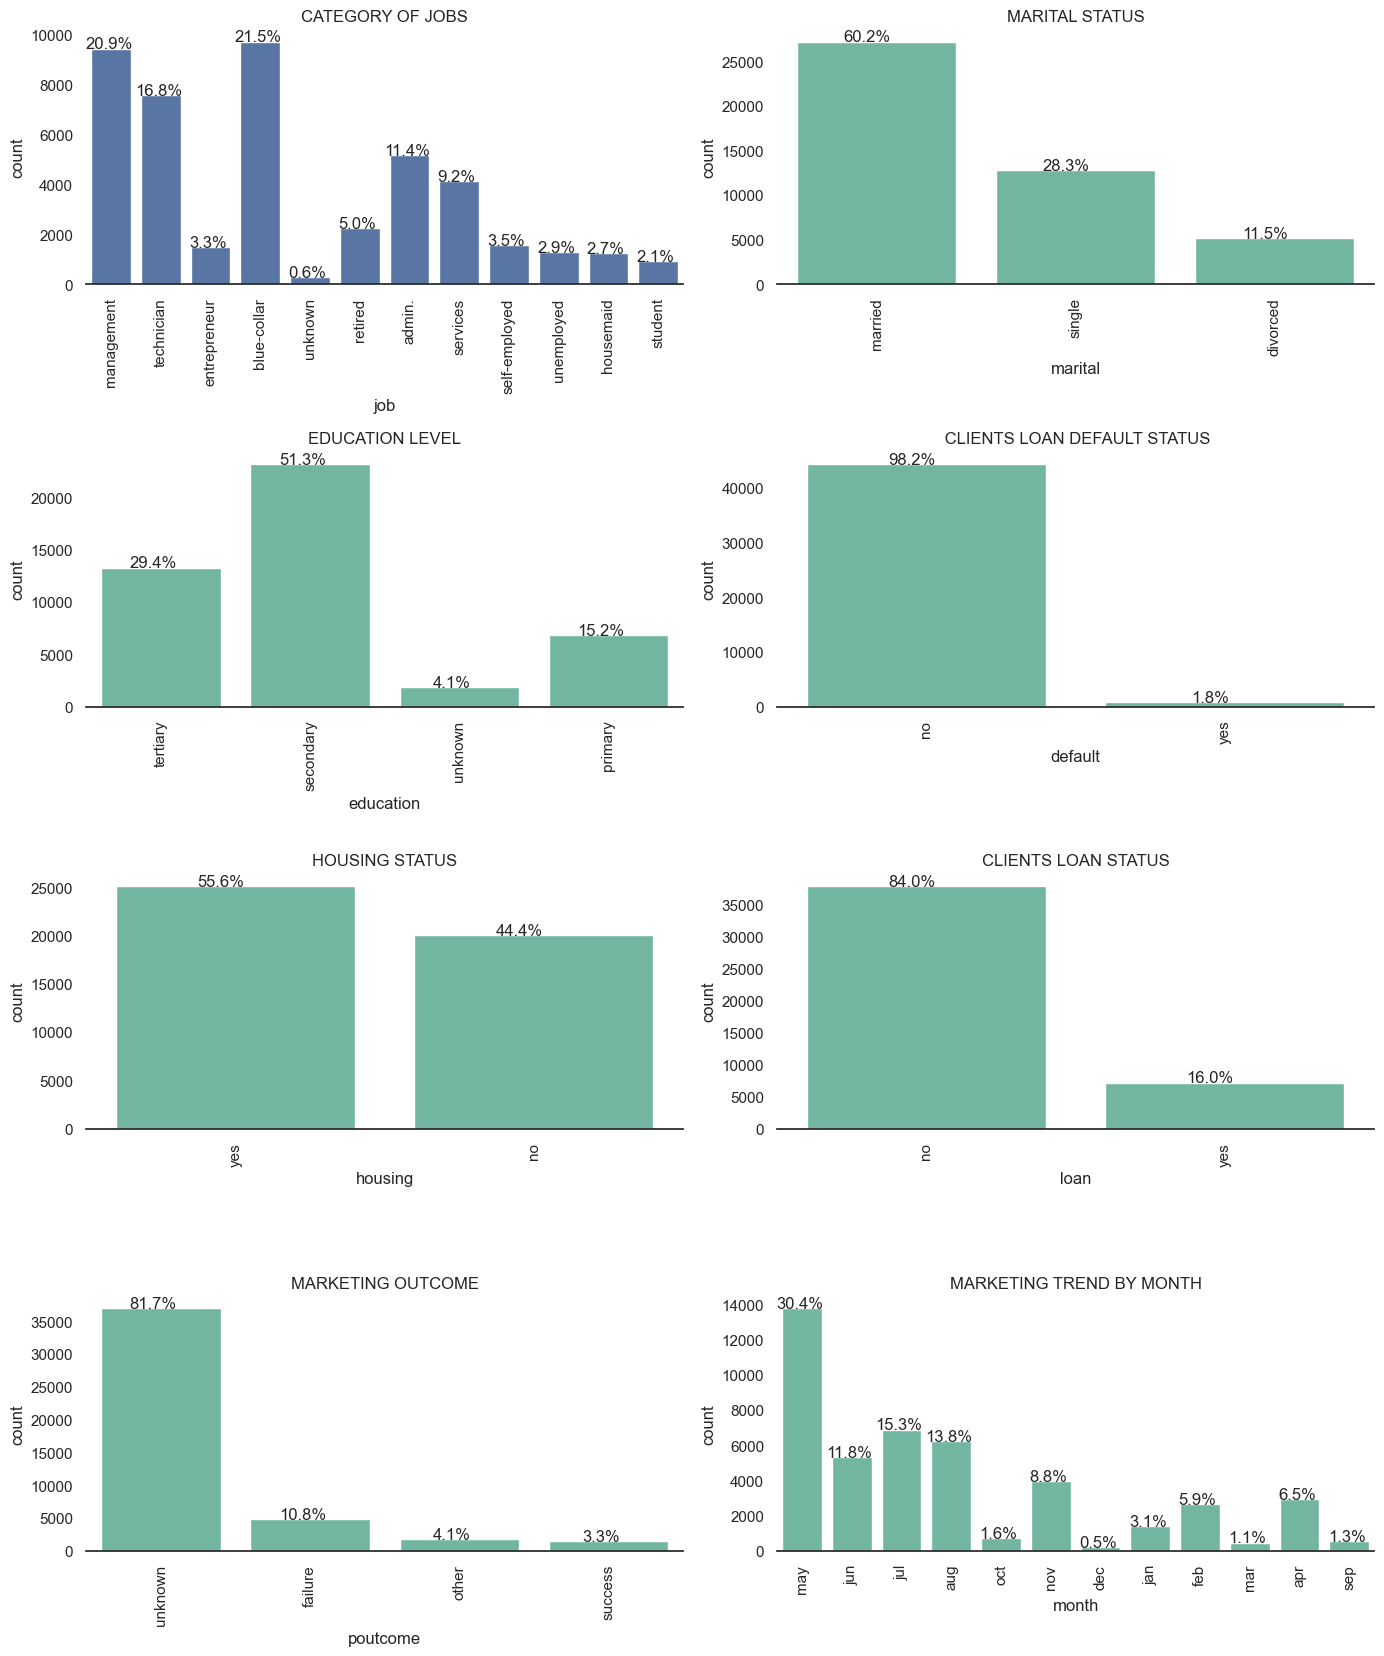

In [8]:
# Making a list of all categorical variables
cat_columns = ['job','marital','education','default',
               'housing','loan','poutcome','month']
title=['Category of Jobs','Marital Status','Education Level',
       ' Clients Loan default status','Housing Status',
       'Clients loan status','Marketing outcome','Marketing Trend by month']
plt.figure(figsize=(14,20))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
list_palette=['Blues_r','Greens_r','Purples_r','Reds_r','Blues_r','Greens_r','Purples_r','Reds_r','Blues_r']

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df[variable].value_counts(ascending=False).index   
                     sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df[variable], data=df)
                     ax.tick_params(axis='x', rotation=90)
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

#### Data Cleaning

In [9]:
# Delete the rows in column 'poutcome' that contains 'other'
condition = df.poutcome == 'other'
df = df.drop(df[condition].index, axis = 0, inplace = False)

In [10]:
# replace 'unknown' in job and education with 'other'
df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

In [11]:
# looking at the unique features in job column
df['job'].value_counts()

job
blue-collar      9331
management       9065
technician       7298
admin.           4930
services         3977
retired          2181
self-employed    1518
entrepreneur     1448
unemployed       1266
housemaid        1214
student           857
other             286
Name: count, dtype: int64

In [12]:
# find and drop outliers in the dataset in particular for the column "balance"
from scipy.stats import zscore

df[['balance']].mean()
df[['balance']].mean()

df['balance_outliers'] = df['balance']
df['balance_outliers']= zscore(df['balance_outliers'])

condition1 = (df['balance_outliers']>3) | (df['balance_outliers']<-3 )
df = df.drop(df[condition1].index, axis = 0, inplace = False)

In [13]:
df = df.drop('balance_outliers', axis =1)

An outlier is defined as the datapoint which is +/- 3 sigma (standard deviation) from the mean. We dropped in the outlier rows in the balance column that have a zscore of greater than +/- 3 sigma.

#### Data preparation
This involves changing column names so that they are easier to understand. 

In [14]:
# change the column name 'y' to 'response'
df.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(df, new_column, old_column):
    df[new_column] = df[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return df[new_column].value_counts()

convert(df, "response_binary", "response")

response_binary
0    37785
1     4870
Name: count, dtype: int64

In [15]:
#checking the column 'contact'.
df['contact'].value_counts()

contact
cellular     27168
unknown      12820
telephone     2667
Name: count, dtype: int64

There is not much information provided by the contact column, dropping it would reduce the size of the dataset. 

In [16]:
# drop the column 'contact'
df = df.drop('contact', axis=1)

In [17]:
# Converting the values in the 'duration' column from seconds to minutes
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

In [18]:
# creating a copy of dataset 
df1 =df.copy()

In [19]:
## changing the values in the month column from categorical to numerical values for analysis
for column in [df]:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [20]:
# drop rows that are of duration less than 5 seconds
condition2 = (df['duration']<5/60)
df = df.drop(df[condition2].index, axis = 0, inplace = False)

In [21]:
# drop client values that in 'education' column that have 'other'
condition3 = (df['education'] == 'other')
df = df.drop(df[condition3].index, axis = 0, inplace = False)

#### Preliminary Data Analysis 
This is meant to look at distribution of data and map out relationships if any between various features.

In [36]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import numpy as np

px.histogram(
    df['age'],
    title='The distribution of age',
    color = df['job'],
    nbins= 50,
    text_auto = True,
    width = 800,
    height = 500
)

The clients tagetted in the tele-marketing campaigns have ages in the range from 18 to 95 years. The majority of the clients are in their 30s and 40s. The majority of them are in the management followed by administration and blue-collar. There is a sharp drop in targetted below above age 60. 

In [37]:
# look at the distribution of balance column
px.histogram(
    df['balance'],
    title='The distribution of balance',
    color = df['marital'],
    nbins= 50,
    text_auto = True
)

After dropping the outliers, the balances of the client range from -7k euros to +10k euros. However, the majority of the client with are with balances less than 2k euros. Most of them that make up this category are married people. 

In [38]:
# Looking at age vs. balance for postive response to campaigns
fig = px.scatter(df, x="age", y="balance", color="response", title = "Relationship between age and balance")
fig.show()

Above analysis indicates, there is no clear dependence between Client's age and the balance. The number of people who signed up for bank deposits are higher above 60 yrs. However, we also notice the clients over 60 years age also have lower balance. 

In [39]:
# Looking at duration vs. campaign for postive response to campaigns
fig = px.scatter(df, x="duration", y="campaign", color="response", title = "Relationship between duration and campaign", marginal_x="histogram", marginal_y="rug")
fig.update_layout(
    xaxis_title="Tele-marketing call duration in minutes",
    yaxis_title="Number of telemarketing calls",
)
fig.show()

The relationship between campaign and call duration provides following valuable insights- 
1. The probability of client accepting to make a deposit at the bank goes down significantly beyond 5-10 calls. 
2. The longer the call duration, higher the probability of customer satifaction and change of opening a deposit account. 

This suggests that the bank should resist calling a client for more than 5 to 10 times, which can be disturbing and increase dissatisfaction.

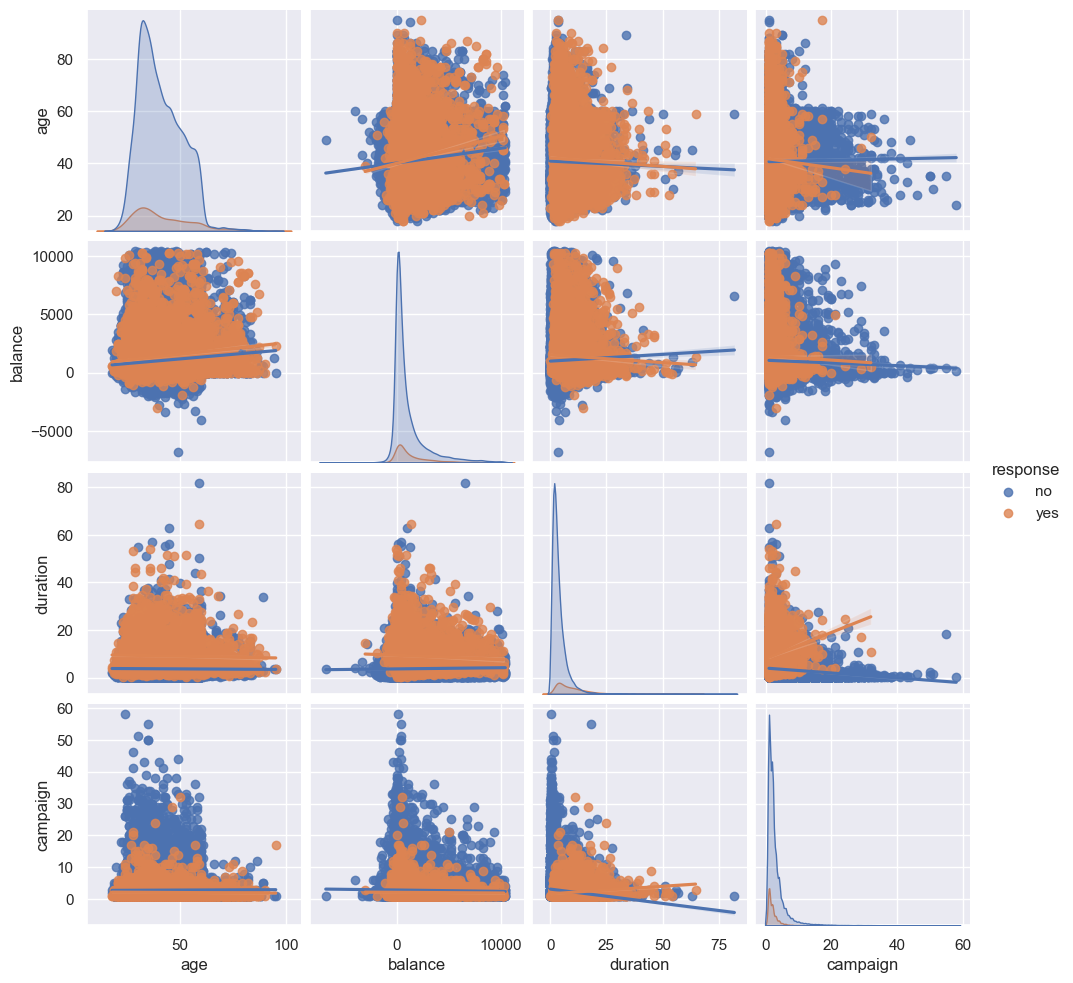

In [45]:
# Visualizing data using seaborn pairplot
import seaborn as sns
sns.pairplot(df, vars=['age', 'balance', 'duration', 'campaign'], hue="response", kind= "reg")
sns.set(rc={'figure.figsize':(11.7,8.7)})

The seaborn pairplot indicate the relationship between various features in the dataset is weak. We see a positive correlation between call duration and campaign for successful attempts. There is also positive correlation between clients age and balance. 

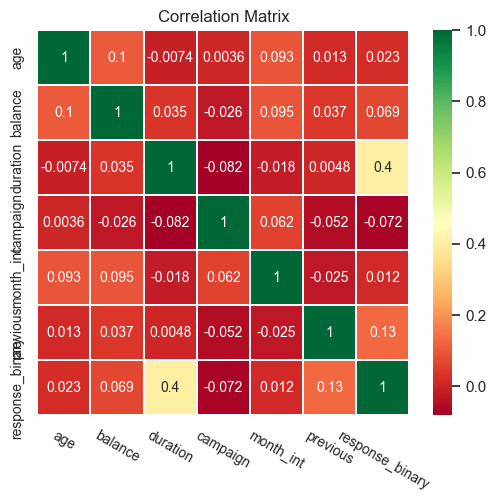

In [46]:
# seaborn heatmap to show the correlation between various parameters
corr_data = df[['age','balance','duration','campaign','month_int','previous','response_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

The seaborn correlation matrix confirm the earlier findings. There is a  positive correlation between campaign outcome and the call duration, and weak correlations between “balance”, “month of contact” and “number of campaign”. These correlations will be explored further using machine learning. 

#### Visualization of feature dependence on campaign outcome
Further exploration of campaign outcome on various features is carried out to better understand the Clients attributes on campaign success rate.

In [47]:
# looking at the relationship between age and the chances of subscription
for column in [df]:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [48]:
count_age_response_pct = pd.crosstab(df['response'],df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

In [49]:
age = pd.DataFrame(df['age_group'].value_counts())

In [50]:
age['% Contacted'] = age['count']*100/age['count'].sum()
age['% Subscription'] = count_age_response_pct['yes']

In [51]:
age.rename(columns={'age_group': 'age'})
age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

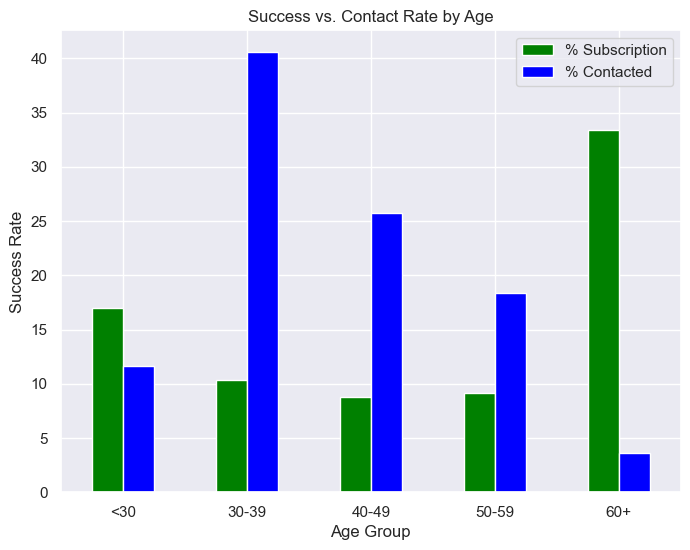

In [52]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','blue'))
plt.xlabel('Age Group')
plt.ylabel('Success Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Success vs. Contact Rate by Age')
plt.show()

There is a dependence between the Success rate and age group. The success rate is the fraction or percentage of success among a number of tele-marketing attempts. Following are main observations- 

1. The number of clients contacted is highest among the age groups 30-39 but the % subscription (blue bar) is lower. Which mean very few people are signing up. This indicates younger people may not have enough money to save or are making investment in other bets such as stocks etc. 
2. On the contrary, the people over 60 yrs have high subscription rate even though fewer % of older people are contacted. 

In [53]:
# looking at the relationship between subscription rate and balance
for column in [df]:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

In [54]:
count_balance_response_pct = pd.crosstab(df['response'],df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [55]:
bal = pd.DataFrame(df['balance_group'].value_counts())
bal['% Contacted'] = bal['count']*100/bal['count'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

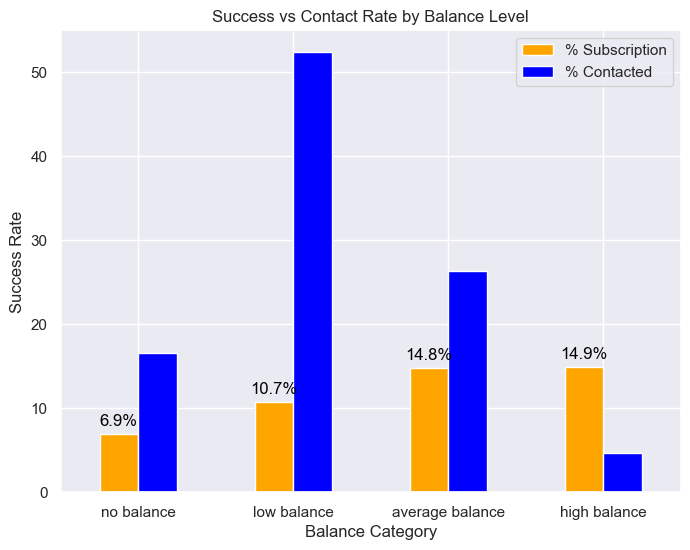

In [56]:
plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('orange','blue'),
                                               figsize = (8,6))

plt.title('Success vs Contact Rate by Balance Level')
plt.ylabel('Success Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

To identify the trend more easily, clients are categorized into four groups based on their levels of balance:

- No Balance: clients with a negative balance.
- Low Balance: clients with a balance between 0 and 1000 euros
- Average Balance: clients with a balance between 1000 and 5000 euros.
- High Balance: clients with a balance greater than 5000 euros.

The relationship between the Success rate and age group provides following valuable insights-
1. The bar charts a positive correlation between balance and success rate. The people with no or negative balance have lower probability of success (6.9%). Intutively this makes sense. The folks having higher balance have high success rate (14.9%). 
2. If we look at the people contacted, we notice telemarketing campaigns contacted more low and no balance folks than people with high balance. 

In [57]:
# look into the relationship between success rate by age and balance
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()

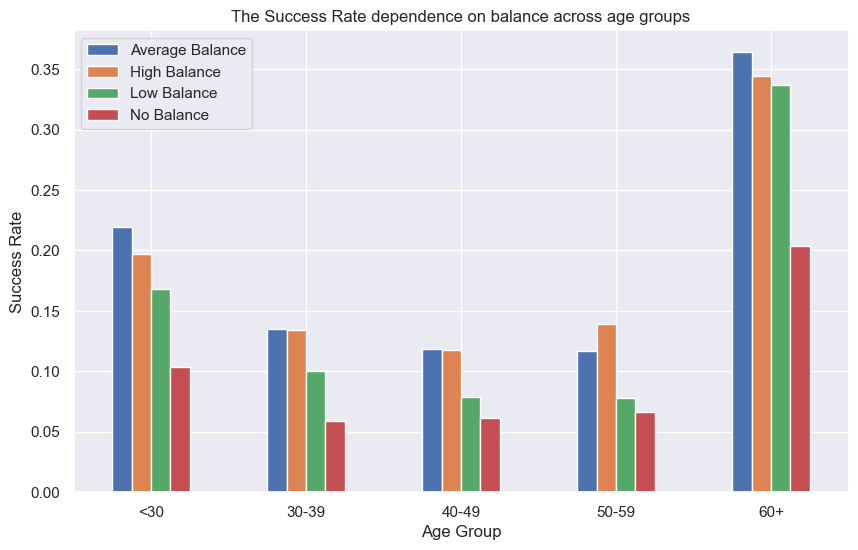

In [58]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Success Rate')
plt.xlabel('Age Group')
plt.title('The Success Rate dependence on balance across age groups')
plt.show()

Key observation- 
1. The success rate of tele-marketing campaigns is highest for people over 60 yrs and younger people below 30 yrs. 
2. Higher balance transilates to higher probability of success. This trend is visible across various age group. 

Take-away-
Tele-marketing campaign in this case should focus on clients above 60 yrs and have positive balances because success rate is 35 %. In addition, banks should also focus on the yonger client (less than 30 yrs of age), the success rate is as high as 15 %. 

In [59]:
# look into the relationship between success rate by job
count_job_response_pct = pd.crosstab(df['response'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

Text(0.5, 0, 'Success Rate')

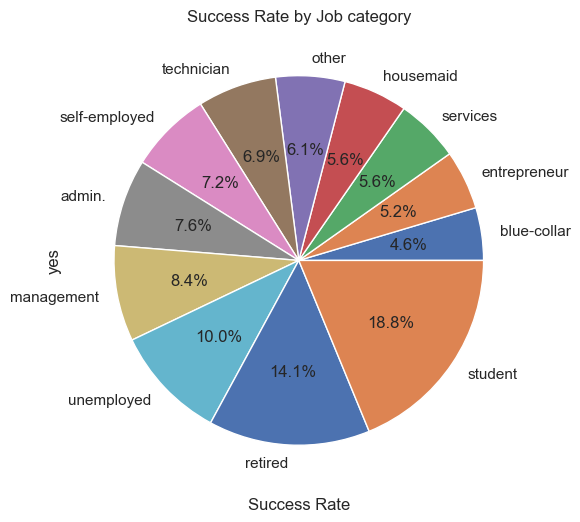

In [60]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='pie', autopct='%1.1f%%',
                                                                           figsize = (12,6))
                                                                               
plt.title('Success Rate by Job category')
plt.xlabel('Success Rate')

From the pie chart above, we clearly see the success rate for tele-marketing campaign is high for students (18.8%) and retirees (14.1%).

In [61]:
# relationship between subsscription and contract rate by month
count_month_response_pct = pd.crosstab(df['response'],df['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

In [62]:
month = pd.DataFrame(df['month_int'].value_counts())
month['% Contacted'] = month['count']*100/month['count'].sum()
month['% Subscription'] = count_month_response_pct['yes']

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)

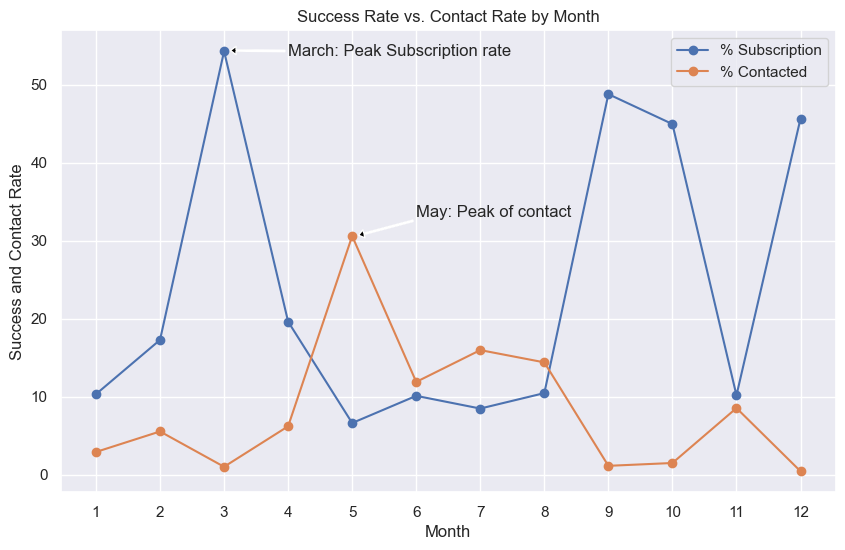

In [63]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Success Rate vs. Contact Rate by Month')
plt.ylabel('Success and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()


To have an effective campaign the success rate and contact rate need to have the same trend but it is not. Following are some key insights-
1. The banks most contacts happen in May, July and August timeframe. The highest contact rate is 30 % in May and is less than 10 % for January to March and Septemper to December. 
2. The success rate from marketing campaign is highest in March (over 50 %) and is it also high from Sept to December (i.e. over 40%).

### Compare the performance of the classifiers for telemarketing campaign business problem
In this section various classifiers such as k-nearest neighbors, logistic regression, decision trees, and support vector machines are run on the dataset and the best performing one will be used to build classification model. 

In [83]:
#load the cleaned dataset
df_clean = pd.read_csv('bank/bank_cleaned.csv')

In [84]:
df_clean.drop(['Unnamed: 0'], axis =1)

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       35    management   married   tertiary      no      231     yes   no   
4       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
40836   25    technician    single  secondary      no      505      no  yes   
40837   51    technician   married   tertiary      no      825      no   no   
40838   71       retired  divorced    primary      no     1729      no   no   
40839   72       retired   married  secondary      no     5715      no   no   
40840   57   blue-collar   married  secondary      no      668      no   no   

       day month  duration  campaign  pdays  previous poutcome response  \
0        5   may   4.35000         1     -1         0  unknown       no   
1        5   may   2.52000         1     -1         0  unknown       no   
2        5   may   1.27000         1     -1         0  unknown       no   
3        5   may   2.32000         1     -1         0  unknown       no   
4        5   may   3.62000         1     -1         0  unknown       no   
...    ...   ...       ...       ...    ...       ...      ...      ...   
40836   17   nov   6.43000         2     -1         0  unknown      yes   
40837   17   nov  16.28000         3     -1         0  unknown      yes   
40838   17   nov   7.60000         2     -1         0  unknown      yes   
40839   17   nov  18.78000         5    184         3  success      yes   
40840   17   nov   8.47000         4     -1         0  unknown       no   

       response_binary  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
40836                1  
40837                1  
40838                1  
40839                1  
40840                0  

[40841 rows x 17 columns]

In [80]:
# drop marital status as it does not offer much insight
df_clean.drop(['marital'], axis=1, inplace=True)
dataset1 = df_clean.iloc[:, 0:7]

The features job, education, default, housing and loan are categorical variables. They need to be transformed into dummy variables so that they can used by ML algorithms. 

In [87]:
oneHotCols = ['job', 'education', 'balance_group', 'marital']
df2 = pd.get_dummies(df, columns=oneHotCols, drop_first=True)
df2['housing'] = df['housing'].map({'yes':1, 'no':0})
df2['default'] = df['default'].map({'yes':1, 'no':0})
df2['loan'] = df['loan'].map({'yes':1, 'no':0})
dataset_response = pd.DataFrame(df['response_binary'])
df2 = pd.merge(df2, dataset_response, left_index = True, right_index = True)

In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40841 entries, 0 to 45209
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         40841 non-null  int64  
 1   default                     40841 non-null  int64  
 2   balance                     40841 non-null  int64  
 3   housing                     40841 non-null  int64  
 4   loan                        40841 non-null  int64  
 5   day                         40841 non-null  int64  
 6   month                       40841 non-null  object 
 7   duration                    40841 non-null  float64
 8   campaign                    40841 non-null  int64  
 9   pdays                       40841 non-null  int64  
 10  previous                    40841 non-null  int64  
 11  poutcome                    40841 non-null  object 
 12  response                    40841 non-null  object 
 13  response_binary_x           40841 no

The features in first 29 columns are customer statistics or features and the value in the last column (i.e 30) is set as target.

In [89]:
## changing the values in the month column from categorical to numerical values for analysis
for column in [df2]:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [90]:
df2.drop(['poutcome', 'response', 'month', 'response_binary_x'], axis=1, inplace=True)

In [93]:
# specify X and Y of the dataset
array = df2.values

# Features: first 20 columns
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]

In [94]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y)

#view transformed values
print(y_transformed)

[0 0 0 ... 1 1 0]


In [95]:
# import libraries for the test and training split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [96]:
# 20% of the data will be used for testing and 80 % for training
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, y_transformed, test_size=test_size, random_state=seed)

In [97]:
# feature scaling to speed up the classification algorithm
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Compare classification algorithms

In [98]:
# importing the models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [102]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

In [103]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.894650 (0.003991)
KNN: 0.890120 (0.005344)
CART: 0.871419 (0.004308)
NB: 0.811980 (0.008819)
SVC: 0.895690 (0.004022)


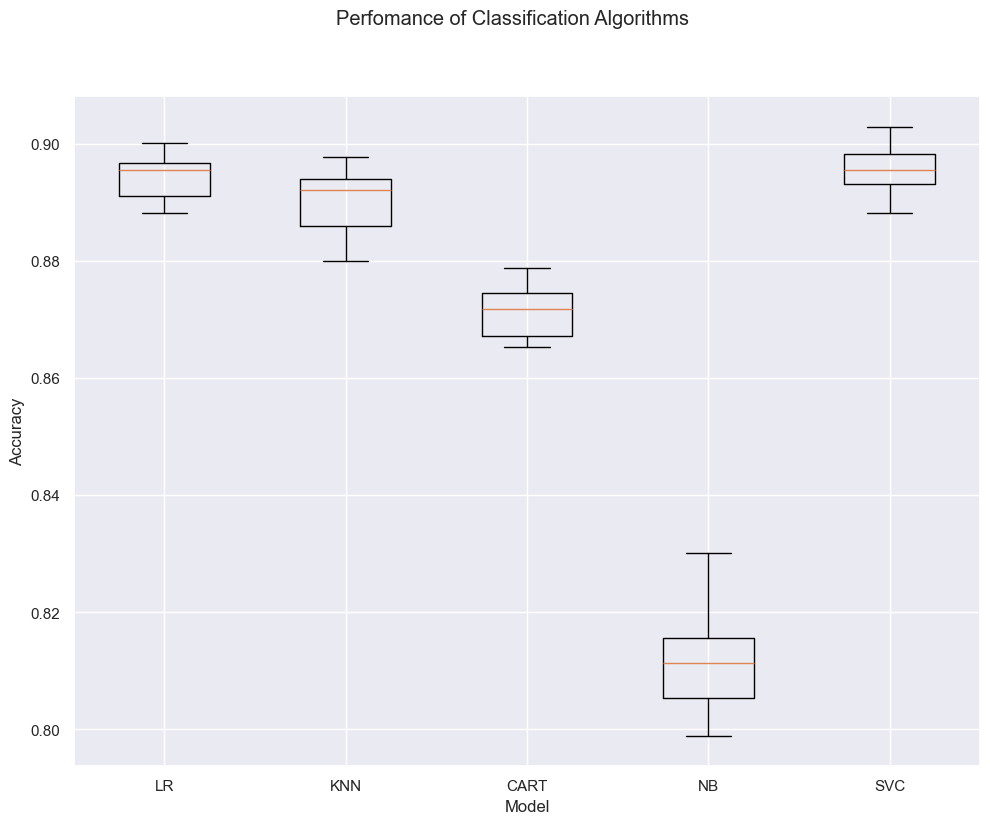

In [104]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

Looking at the above plot, we see the Logistic regression (89.4% accuracy) and SVC (89.5% accuracy) perform best incomparison to decision trees, KNN and Gaussian native bias classifiers.

Main objective of building a model using the best classification algorithm- 

The model can make prediction for two scenarios-
1. Predicting a person will open a bank deposit but he actually doesn't.(Loss of Resource)
2. Predicting a person will not open a bank deposit but he actually does.(Loss of Opportunity)

Which case is more important?

The whole purpose of the tele-marketing campaign is to bring in more customers. 2nd case is more important to us .A potential customer is missed by the sales/marketing team .It's lost of opportunity.So we want to minimize this loss.

In [119]:
# Test LR model on the test set
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [120]:
#evaluate LR model
predictions = LR.predict(X_test)

In [121]:
# Accuracy Score 
print(accuracy_score(Y_test, predictions))

0.8948463704247765


Accuracy score is the percentage of correct predictions out of all predictions made. The LR algorithm achieves an accuracy of 89.4%, suggesting it is one of the best models to classify the client's response given all features.

[[7128  150]
 [ 709  182]]


<Figure size 800x600 with 0 Axes>

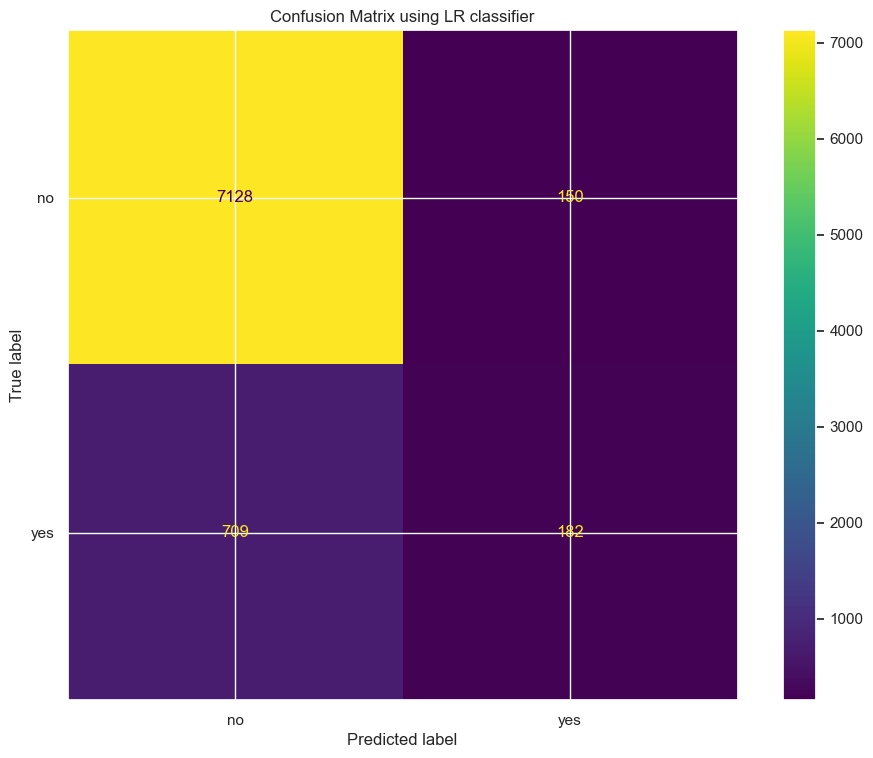

In [158]:
# Confusion Matrix for LR classifier
from sklearn.metrics import confusion_matrix
import pylab as pl
plt.figure(figsize=(8, 6))
print(confusion_matrix(Y_test, predictions))
LR_cm_mat1 = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=LR_cm_mat1,  display_labels = ['no','yes'])
disp.plot()
plt.title('Confusion Matrix using LR classifier')
plt.show()

The confusion matrix for the LR classifier indicates the model is able to classify 182 outcomes that are positive and 7128 outcomes that are negative correctly. The number of false negatives is about 709 and false positives is about 150. The classification report below indicates the 91% precision for negative outcome and 55 % precision for positive outcome and accuracy of 89 % overall. 

In [156]:
# Classification Report for LR classifier
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7278
           1       0.55      0.20      0.30       891

    accuracy                           0.89      8169
   macro avg       0.73      0.59      0.62      8169
weighted avg       0.87      0.89      0.87      8169



ROC (Reciever Operating Charecteristic) curve

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

The area under the curve is a measure of test accuracy.

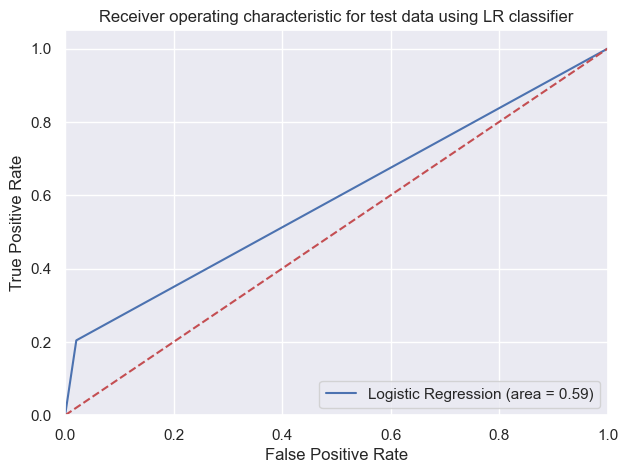

In [165]:
#ROC-AUC curve on test data
logit_roc_auc_train = roc_auc_score(Y_test, predictions)
fpr, tpr, thresholds = roc_curve(Y_test, predictions)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test data using LR classifier')
plt.legend(loc="lower right")
plt.show()

The AUC for the LR classifier model is about 59 %, it is mainly because it has lower true positive rate overall on the test dataset. 

In [192]:
# 20% of the data will be used for testing and 80 % for training
# specify X and Y of the dataset
array = df2.values

# Features: first 20 columns
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]

test_size= 0.33
seed = 7
X_train_svc, X_test_svc, Y_train_svc, Y_test_svc= train_test_split(X, y_transformed, test_size=test_size, random_state=seed)

In [198]:
# Scaling the data for faster classification
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_svc = sc.fit_transform(X_train_svc)
X_test_svc = sc.transform(X_test_svc)

In [204]:
# Fitting SVC classifier on the test data
sv = SVC(gamma='auto')
sv.fit(X_train_svc, Y_train_svc)

SVC(gamma='auto')

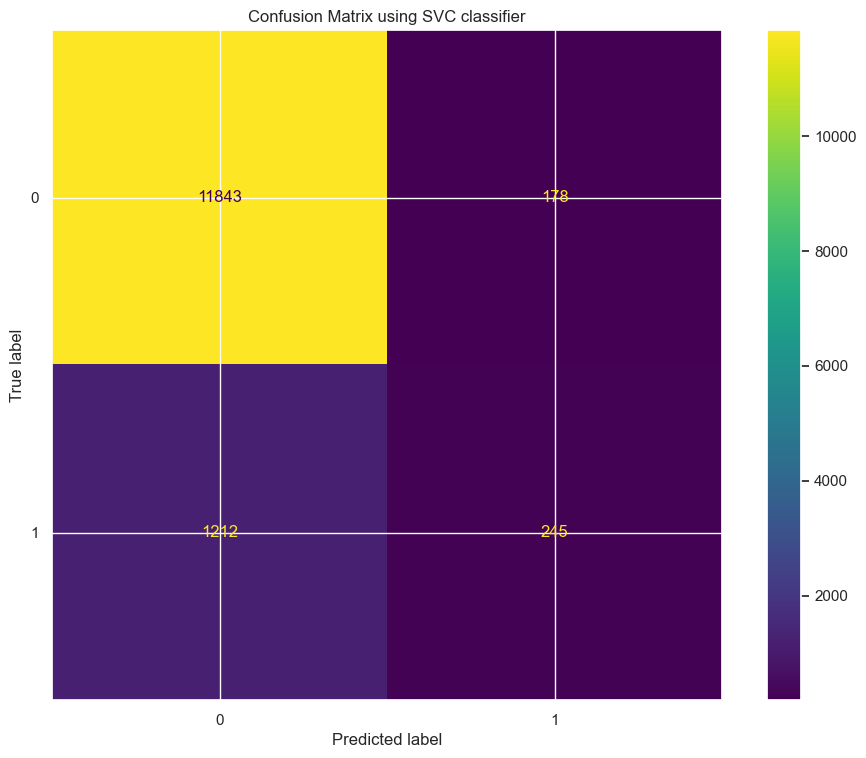

In [205]:
# Confusion matrix for SVC classifier
SVC(random_state=0)
predictions_svc = sv.predict(X_test_svc)
cm = confusion_matrix(Y_test_svc, predictions_svc, labels=sv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sv.classes_)
disp.plot()
plt.title('Confusion Matrix using SVC classifier')
plt.show()

In [206]:
# Classification Report for SVC classifier
from sklearn.metrics import classification_report
print(classification_report(Y_test_svc, predictions_svc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     12021
           1       0.58      0.17      0.26      1457

    accuracy                           0.90     13478
   macro avg       0.74      0.58      0.60     13478
weighted avg       0.87      0.90      0.87     13478



The confusion matrix for the SVC classifier indicates the model is able to classify 245 outcomes that are positive and 11843 outcomes that are negative correctly. The number of false positives is about 245 and false negatives is about 1212. The classification report below indicates the 91% precision for negative outcome and 58 % precision for positive outcome and accuracy of 90 % overall. 

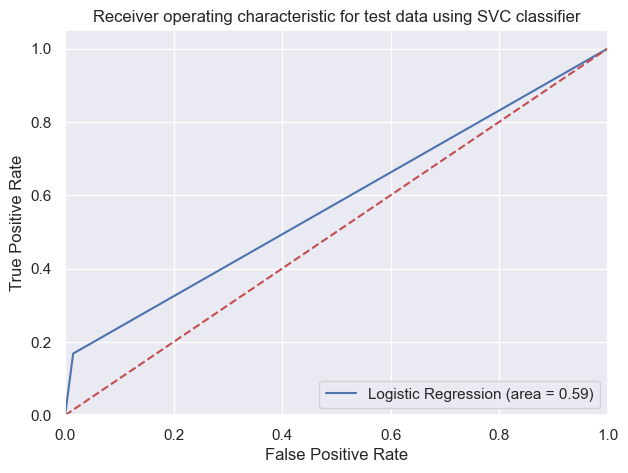

In [207]:
#ROC-AUC curve on SVC test data
svc_roc_auc_train = roc_auc_score(Y_test_svc, predictions_svc)
fpr, tpr, thresholds = roc_curve(Y_test_svc, predictions_svc)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test data using SVC classifier')
plt.legend(loc="lower right")
plt.show()

The AUC curve for SVC and LR model looks similar and AUC is about 59 %. Either of the models could be used for classification. 

#### Comparison of regression algorithm
Six different regression algorithms (Linear Regression, Lasso, Ridge, ElasticNet, K Neighbors and Decision Tree) are run on the dataset and the best-performing one will be used to build the estimation model.The objective of the regression model is to select the model that predicts the dependence between the duration of the tele-marketing call and the success of client making the deposit at the bank. 

In [230]:
# computing X and Y for the dataset
array = df2.values
X = df2.drop(['duration'], axis=1)
Y = df2['duration']

In [231]:
# splitting test and training 
test_size= 0.20
seed = 10
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [233]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [234]:
# computing negative mean squared error for various regression model
results_e2 = []
names_e2 = []
seed = 7
for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -15.404731 (1.318716)
LASSO: -18.680236 (1.386006)
RIDGE: -15.404711 (1.318711)
EN: -18.508212 (1.385650)
KNN: -22.023999 (1.237654)
CART: -30.454670 (1.842339)


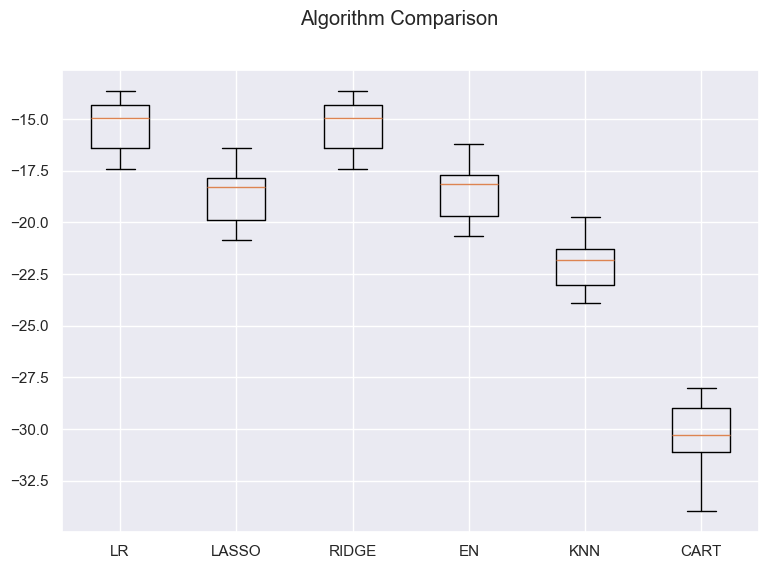

In [235]:
# Plot results
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2)
plt.show()

Ridge and logistic regression outperforms other models. 

In [236]:
#  standardize the data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))

In [237]:
# computing negative mean squared error for various regression model
results_e2_normalized = []
names_e2_normalized = []
seed = 7
for name, model in pipelines:
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2_normalized.append(cv_results)
    names_e2_normalized.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -15.404731 (1.318716)
ScaledLASSO: -16.650913 (1.342784)
ScaledRIDGE: -15.404728 (1.318716)
ScaledEN: -16.492271 (1.339835)
ScaledKNN: -17.526992 (1.344572)
ScaledCART: -30.434374 (1.984157)


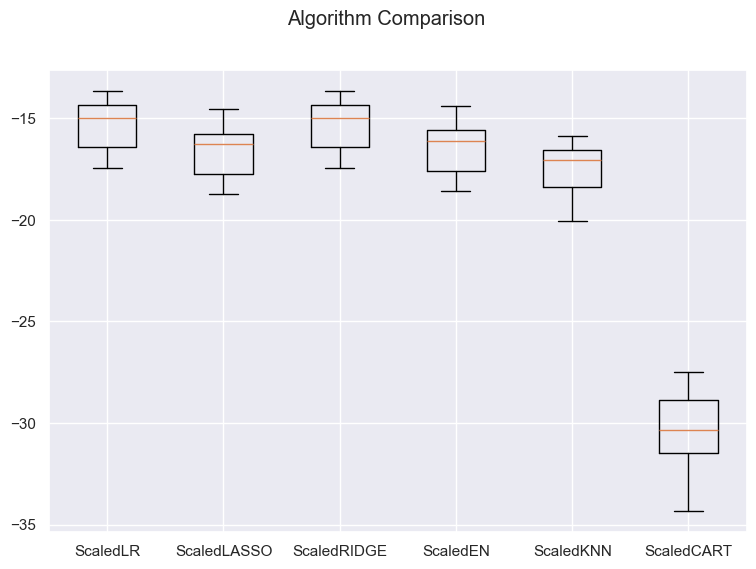

In [238]:
# Plot results for the scaled model
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2_normalized)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2_normalized)
plt.show()

In [239]:
# test the ridge model on the test dataset
ridge = Ridge()
ridge.fit(X_train, Y_train)
predicted_y = ridge.predict(X_test)

In [240]:
#evaluate the ridge model
from sklearn.metrics import mean_squared_error
print('The MSE is', mean_squared_error(Y_test, predicted_y))

The MSE is 15.027250384873257


The regression analysis on scaled data using 6 different models indicates that logistic and ridge regression have lowest negative mean square error. The ridge model was fit on the training data and tested on the test dataset and the mean square value on the test dataset is 15, this indicated the model could be used to predict the dependence between tele-marketing call duration and client success or subscription rate of making a deposit accurately. Bank could use this model to select the customers before making the call.  

### Summary
The goal of this project is to compare the performance of the classifiers(k-nearest neighbor, logistic regression, decision tree, and support vector machines) for the purpose of helping bank managers in prioritizing and selecting the next customers to be contacted during bank marketing campaigns. 

In response, I have analyzed the dataset thoroughly to understand the dependencies between the various features using different visualization techniques and evaluated various classification algorithms in terms of accuracy, precision and recall scores. ROC curves were analyzed for SVC and Logistic regression classifier to determine the AUC values for the best classifiers. Using this approach the probability of success and failure of marketing campaigns could be accurately predicted. Finally, six different regression models were explored to  the relationship between call duration and the various features of the dataset. Using this information bank can target the customers to call based on their profile and background information. 

### Conclusions
Following are main attributes for the client that are likely to sign-up for making bank deposits-
1. Success rate is high for age groups below 30 yrs and above 60 yrs
2. Success rate is high for students (18.8%) and retirees (14.1%).
3. Higher balance (>5000 euros) transilates to higher probability of success. This trend is visible across various age group.
4. The longer the call duration, higher the probability of customer satifaction and change of opening a deposit account.

##### Comparison of performance of the classifiers
Logistic regression and SVC have accuracy of 89.4% (+/-0.39) and 89.5%(+/-0.4), respectively. The classification matrix indicated LR model has 91% precision for negative outcome and 55 % precision for positive outcome and AUC of 59 %. In comparison, SVC model has 91% precision for negative outcome and 58 % precision for positive outcome and AUC of 59%. Bank can use both SVC and Logistic regression to make predictions on the customers to call for the tele-marketing campaigns.

##### Comparison of performance of the regression models
Out of 6 different models for predicting the call duration the logistic and ridge regression have lowest negative mean square error. The use of regression models is expected to increase the efficiency of the bank's telemarketing campaign. Thus, saving both cost, effort and resources for marketing.  

#### Recommendations
To have successful marketing campaign banks need to do the following- 
1. Target right customers based on the classification algorithms
The bank can use the machine learning models for classification to improve the efficiency in selecting the customers for the telemarketing calls. This is expected to lower the cost, effort and reduce the imbalance in original dataset presenting more accurate information for improving the subscrition rate for bank deposits. 
2. Improve customer satification
Using advanced data visualizations and analysis, the banks can understand the dependences between the various customer attributes and changes of having a successful outcome for marketing campaigns. This will help to bank to provide better services for the customers in need (such as students and retires who are more likely to make deposits). 
3. Timing, duration and number of calls in the campaigns
The timing and duration of the marketing campaign plays an important role when targetting customers for successful campaigns. The success rate from marketing campaign is highest in March (over 50 %) and is it also high from Sept to December (i.e. over 40%).The probability of client accepting to make a deposit at the bank goes down significantly beyond 5-10 calls.The longer the call duration, higher the probability of customer satifaction and change of opening a deposit account.